In [2]:
#!pip install pandas

## Importación de Librerias

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Datos
Se trabajará con 2 datasets, uno con datos referidos a las viviendas y otro referido a las personas habitantes de la vivienda.

In [4]:
# Carga de Datos de vivienda.
df_hogares = pd.read_csv('../data/raw/EPH_usu_hogar_tic_t418.txt', delimiter=';')

# Carga de Datos de personas.
df_personas = pd.read_csv('../data/raw/EPH_usu_Indiv_tic_t418.txt', delimiter=';')

## Impresión de Datos de viviendas

In [5]:

print(df_hogares.head())

                          CODUSU  NRO_HOGAR  REALIZADA  ANO4  TRIMESTRE  \
0  TQRMNOPPQHJMKMCDEFIAH00622969          1          1  2018          4   
1  TQRMNOPPQHJMLUCDEFIAH00622993          1          1  2018          4   
2  TQRMNOPPQHMMLUCDEFIAH00594749          1          1  2018          4   
3  TQRMNOPPRHJMLUCDEFIAH00623008          1          1  2018          4   
4  TQRMNOPPSHJMKMCDEFIAH00623022          1          1  2018          4   

   AGLOMERADO  POND_TIC  IH_II_01  IH_II_02  
0           2       539         1         1  
1           2       545         1         1  
2           2       612         1         1  
3           2       545         1         1  
4           2       539         1         1  


## Impresión de Datos de personas

In [6]:
print(df_personas.head())

                          CODUSU  NRO_HOGAR  COMPONENTE  ANO4  TRIMESTRE  \
0  TQRMNOPPQHJMKMCDEFIAH00622969          1           1  2018          4   
1  TQRMNOPPQHJMKMCDEFIAH00622969          1           2  2018          4   
2  TQRMNOPPQHJMKMCDEFIAH00622969          1           3  2018          4   
3  TQRMNOPPQHJMLUCDEFIAH00622993          1           1  2018          4   
4  TQRMNOPPQHJMLUCDEFIAH00622993          1           2  2018          4   

   AGLOMERADO  POND_TIC  RESPONDENTE  IP_III_04  IP_III_05  IP_III_06  
0           2       539          1.0          1          1          1  
1           2       539          1.0          1          1          1  
2           2       539          1.0          1          1          1  
3           2       545          2.0          1          1          1  
4           2       545          2.0          1          1          1  


## Limpieza y preparación de Datos

In [7]:
# Selección de filas relevantes para el análisis de hogares (solo trabajaremos con datos de Rio Grande y Ushuaia)
df_hogartdf = df_hogares[df_hogares['AGLOMERADO'] == 31]

# Selección de columnas relevantes para el análisis de hogares
hogar_cols = ['CODUSU', 'NRO_HOGAR', 'IH_II_01', 'IH_II_02']
df_hogartdf = df_hogartdf[hogar_cols]

# Renombrando columnas para mayor claridad
df_hogartdf.columns = ['codigo_vivienda', 'nro_hogar', 'tiene_computadora', 'acceso_internet']

# Eliminación de filas con valores faltantes
df_hogartdf = df_hogartdf.dropna()

# Vista previa del dataset de viviendas
df_hogartdf.head()

,codigo_vivienda,nro_hogar,tiene_computadora,acceso_internet
12285,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1
12286,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1
12287,TQRMNOPPRHJMKPCDEIHJF00626438,1,1,1
12288,TQRMNOPPRHKNKQCDEIHJF00620859,1,1,1
12289,TQRMNOPPSHJMKMCDEIHJF00626453,1,1,1


In [8]:
# Selección de columnas relevantes para el análisis de personas (solo trabajaremos con datos de Rio Grande y Ushuaia)
df_personatdf = df_personas[df_personas['AGLOMERADO'] == 31]

# Selección de columnas relevantes para el análisis de personas
persona_cols = ['CODUSU', 'NRO_HOGAR', 'IP_III_04', 'IP_III_05', 'IP_III_06']
df_personatdf = df_personatdf[persona_cols]

# Renombrando columnas para mayor claridad
df_personatdf.columns = ['codigo_vivienda', 'nro_hogar', 'uso_internet', 'uso_computadora', 'uso_movil']

# Eliminación de filas con valores faltantes
df_personatdf = df_personatdf.dropna()

# Vista previa del dataset de personas
df_personatdf.head()

,codigo_vivienda,nro_hogar,uso_internet,uso_computadora,uso_movil
36805,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1
36806,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1
36807,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1
36808,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1
36809,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,2


## Análisis Descriptivo de los Datos

In [9]:
# Proporción de hogares con acceso a internet
print("\nProporción de hogares con acceso a internet: (1 SI tiene acceso, 2 NO tiene acceso)")
print(df_hogartdf['acceso_internet'].value_counts(normalize=True))

# Proporción de uso de internet entre personas
print("\nProporción de personas que usan internet: (1 SI usa internet, 2 NO usa internet)")
print(df_personatdf['uso_internet'].value_counts(normalize=True))


Proporción de hogares con acceso a internet: (1 SI tiene acceso, 2 NO tiene acceso)
acceso_internet
1    0.894472
2    0.105528
Name: proportion, dtype: float64

Proporción de personas que usan internet: (1 SI usa internet, 2 NO usa internet)
uso_internet
1    0.913462
2    0.086538
Name: proportion, dtype: float64


## Construcción del Modelo de Regresión Logística

In [10]:
# Unir datos de hogares y personas
df_hogares_personas = pd.merge(df_hogartdf, df_personatdf, on=['codigo_vivienda', 'nro_hogar'])

# Vista previa del dataset unificado
df_hogares_personas.head()

,codigo_vivienda,nro_hogar,tiene_computadora,acceso_internet,uso_internet,uso_computadora,uso_movil
0,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1,1,1
1,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1,1,1
2,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,1
3,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,1
4,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,2


In [11]:
# Convertir valores 'SI' (1) y 'NO' (2) a 1 y 0
df_hogares_personas['tiene_computadora'] = df_hogares_personas['tiene_computadora'].apply(lambda x: 1 if x == 1 else 0)
df_hogares_personas['acceso_internet'] = df_hogares_personas['acceso_internet'].apply(lambda x: 1 if x == 1 else 0)
df_hogares_personas['uso_internet'] = df_hogares_personas['uso_internet'].apply(lambda x: 1 if x == 1 else 0)
df_hogares_personas['uso_computadora'] = df_hogares_personas['uso_computadora'].apply(lambda x: 1 if x == 1 else 0)
df_hogares_personas['uso_movil'] = df_hogares_personas['uso_movil'].apply(lambda x: 1 if x == 1 else 0)

## Agrupar los Datos por Vivienda

In [12]:
data_group_vivienda = df_hogares_personas.groupby('codigo_vivienda').mean().reset_index()

## Seleccionar las Características y la Variable Objetivo

In [13]:
features = ['tiene_computadora', 'uso_internet', 'uso_computadora', 'uso_movil']
X = data_group_vivienda[features]
y = data_group_vivienda['acceso_internet']

## Crear Gráficos de Dispersión

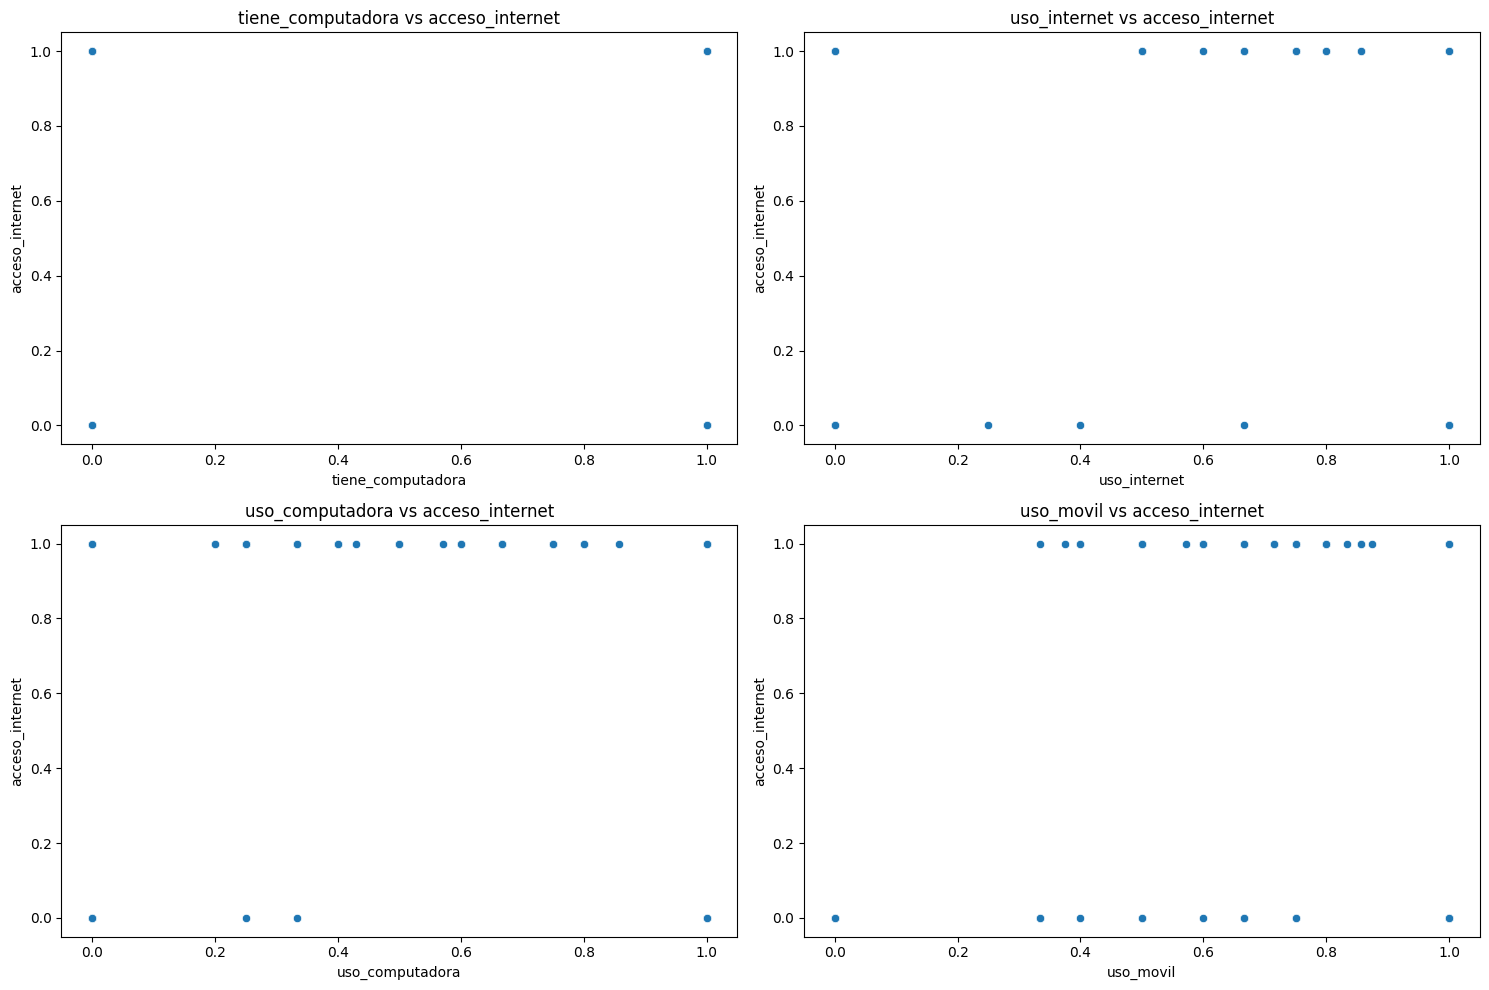

In [14]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data_group_vivienda, x=feature, y='acceso_internet')
    plt.title(f'{feature} vs acceso_internet')
    plt.xlabel(feature)
    plt.ylabel('acceso_internet')

plt.tight_layout()
plt.show()

## Dividir los Datos en Conjuntos de Entrenamiento y Prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Crear y Entrenar el Modelo de Regresión Logística

In [16]:
reg_log = LogisticRegression(max_iter=1000)
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Hacer Predicciones y Evaluar el Modelo

In [17]:
y_pred = reg_log.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.975

Confusion Matrix:
[[ 2  2]
 [ 0 76]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.97      1.00      0.99        76

    accuracy                           0.97        80
   macro avg       0.99      0.75      0.83        80
weighted avg       0.98      0.97      0.97        80



## Crear y Visualizar la Matriz de Confusión

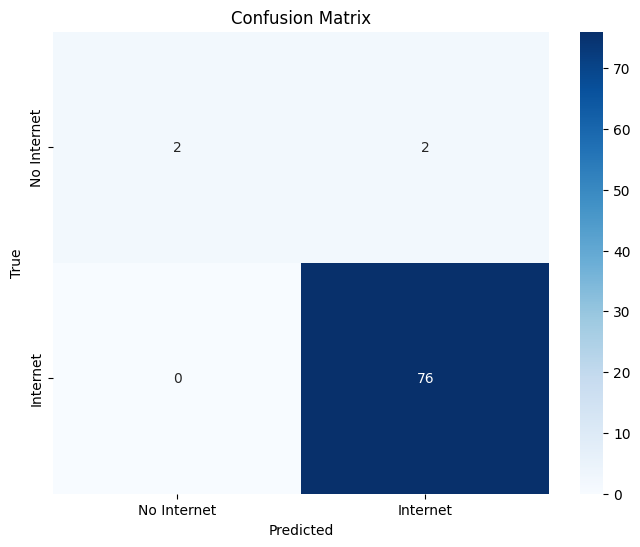

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Internet', 'Internet'], yticklabels=['No Internet', 'Internet'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Interpretación de los Resultados:

En el contexto de clasificación binaria (sí/no, 1/0), los datos se dividen en dos clases: la clase positiva y la clase negativa. En este caso:

* Clase 1: Hogares con acceso a Internet (acceso_internet = 1)
* Clase 0: Hogares sin acceso a Internet (acceso_internet = 0)

Cuando decimos que la clase 0 tiene menos datos, significa que hay significativamente menos hogares sin acceso a Internet en el conjunto de datos en comparación con los hogares que sí tienen acceso. Esto se puede observar en el informe de clasificación donde el soporte (support) muestra la cantidad de ocurrencias de cada clase:

* Support para la clase 0: 4 hogares
* Support para la clase 1: 76 hogares

* Exactitud (Accuracy): La exactitud del modelo es del 97%, lo que significa que el modelo predice correctamente si un hogar tiene acceso a Internet el 97% de las veces.
* Precision: La precisión para la clase 1 (acceso a Internet) es muy alta (0.97), lo que indica que el modelo tiene una baja tasa de falsos positivos.
   * Clase 0: La precisión de 1.00 indica que de todos los hogares predichos como "sin acceso a Internet", el 100% realmente no tienen acceso a Internet.
   * Clase 1: La precisión de 0.97 indica que de todos los hogares predichos como "con acceso a Internet", el 97% realmente tienen acceso a Internet.

Atención!! Debido a que hay pocos ejemplos en la clase 0, el modelo puede tener dificultades para identificar correctamente estos casos, lo que puede llevar a una menor precisión en esa clase.

* Recall: El recall para la clase 1 es también muy alta (1.00), lo que indica que el modelo no tiene tasa de falsos negativos.
   * Clase 0: El recall de 0.50 indica que el 50% de todos los hogares que realmente no tienen acceso a Internet fueron correctamente identificados por el modelo.
   * Clase 1: El recall de 1.00 indica que el 100% de todos los hogares que realmente tienen acceso a Internet fueron correctamente identificados por el modelo.

La precisión y el recall para la clase 1 (Internet) son muy altos, lo que indica que el modelo es muy efectivo para identificar hogares con Internet. La clase 0 (No Internet) tiene menos datos, lo que afecta negativamente la precisión y el recall en esa clase.
* F1-score: La f1-score para la clase 1 es alta (0.99), lo que muestra un buen equilibrio entre precisión y recall.

### Interpretación de la Matriz de Confusión

* True Positives (TP): 76 hogares con Internet fueron correctamente clasificados como hogares con Internet.
* True Negatives (TN): 2 hogares sin Internet fueron correctamente clasificados como hogares sin Internet.
* False Positives (FP): 0 hogares sin Internet fue incorrectamente clasificado como hogares con Internet.
* False Negatives (FN): 2 hogares con Internet fue incorrectamente clasificado como hogares sin Internet.

## Árboles de Decisión y Random Forest

Pregunta: ¿Cuáles son las principales características que distinguen a los hogares que usan internet de aquellos que no lo usan?

### Importar librerias

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Entrenar y Evaluar el Modelo de Árbol de Decisión

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=features).sort_values(ascending=False)

## Entrenar y Evaluar el Modelo de Random Forest

In [21]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

## Mostrar Resultados e Importancia de las Características

Decision Tree Accuracy: 0.8875
              precision    recall  f1-score   support

         0.0       0.22      0.50      0.31         4
         1.0       0.97      0.91      0.94        76

    accuracy                           0.89        80
   macro avg       0.60      0.70      0.62        80
weighted avg       0.93      0.89      0.91        80

Decision Tree Feature Importances:
uso_internet         0.765926
tiene_computadora    0.099088
uso_movil            0.074226
uso_computadora      0.060759
dtype: float64
Random Forest Accuracy: 0.925
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         4
         1.0       0.97      0.95      0.96        76

    accuracy                           0.93        80
   macro avg       0.65      0.72      0.68        80
weighted avg       0.94      0.93      0.93        80

Random Forest Feature Importances:
uso_internet         0.488006
tiene_computadora    0.334306
uso_computadora     

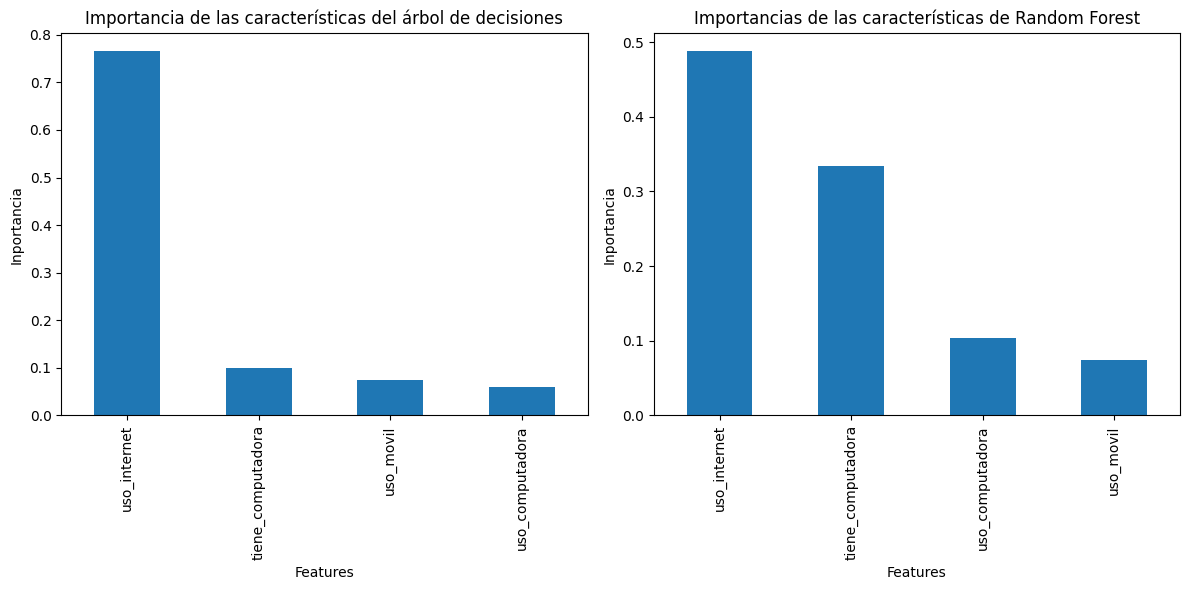

In [24]:
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(report_dt)
print("Decision Tree Feature Importances:")
print(feature_importances_dt)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(report_rf)
print("Random Forest Feature Importances:")
print(feature_importances_rf)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
feature_importances_dt.plot(kind='bar', title='Importancia de las características del árbol de decisiones')
plt.xlabel('Features')
plt.ylabel('Inportancia')

plt.subplot(1, 2, 2)
feature_importances_rf.plot(kind='bar', title='Importancias de las características de Random Forest')
plt.xlabel('Features')
plt.ylabel('Inportancia')

plt.tight_layout()
plt.show()

### Interpretación de los Resultados y comparaciones entre modelos

Árbol de Decisión:

* El modelo de Árbol de Decisión tiene una exactitud del 88.75%.
* La característica más importante es `uso_internet` con una importancia del 76.59%, seguida de `tiene_computadora` con una importancia del 9.91%.

Random Forest:

* El modelo de Random Forest tiene una exactitud del 92.5%.
* La característica más importante es `uso_internet` con una importancia del 48.80%, seguida de `tiene_computadora` con una importancia del 33.43%.

### Conclusión:

* Ambas técnicas indican que el uso de Internet y tener una computadora son las características más importantes para distinguir entre hogares que usan Internet y aquellos que no lo usan.
* El modelo de Random Forest ofrece una precisión mayor y proporciona una importancia más equilibrada entre las características en comparación con el Árbol de Decisión.

El modelo de Random Forest tiene un mejor rendimiento general en comparación con el modelo de Árbol de Decisión. Tiene una mayor exactitud, y mejor precisión, recall y f1-score para ambas clases. Por lo tanto, para distinguir entre hogares que usan Internet y aquellos que no lo usan, el modelo de Random Forest es la mejor opción.